In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model

   Chiều cao (cm)  Cân nặng (kg)
0             147             49
1             150             50
2             153             51
3             155             52
4             158             54


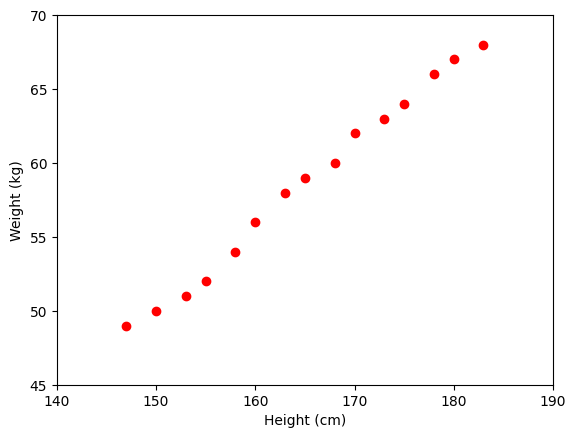

In [170]:
### Multiple linear regression ###

dataframe = pd.read_csv('/home/quyet/DATA_ML/WorkSpace/segmentation/tutorial/Untitled Folder/Untitled 1.csv')
X = np.array(dataframe['Chiều cao (cm)'])
y = np.array(dataframe['Cân nặng (kg)'])
print(dataframe.head())
plt.plot(X, y, 'ro')
plt.axis([140,190, 45,70])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

w =  [-34.54231975   0.56381549]


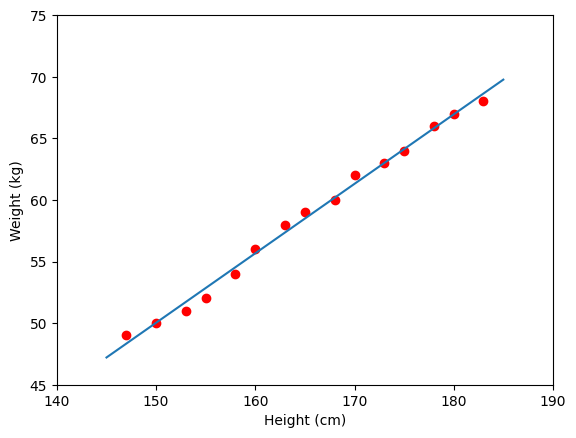

Predict weight of person with height 155 cm: 52.85 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.67 (kg), real number: 56 (kg)
Solution found by scikit-learn  :  [-34.54231975   0.56381549]
Solution found by (5):  [-34.54231975   0.56381549]


In [171]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X[...,np.newaxis]), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w_0 = w[0]
w_1 = w[1]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

In [172]:
### Multiple linear regression ###

In [173]:
dataframe = pd.read_csv('/home/quyet/DATA_ML/WorkSpace/segmentation/tutorial/Untitled Folder/heart.data.csv')
x1 = np.array(dataframe['biking'])[...,np.newaxis]
x2 = np.array(dataframe['smoking'])[...,np.newaxis]
ones = np.ones((x1.shape[0], 1))
Xbar = np.concatenate([ones,x1,x2], axis=-1)
y = np.array(dataframe['heart.disease'])[...,np.newaxis]
dataframe.head()

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


Solution found by scikit-learn  :  [[14.98465799 -0.20013305  0.17833391]]


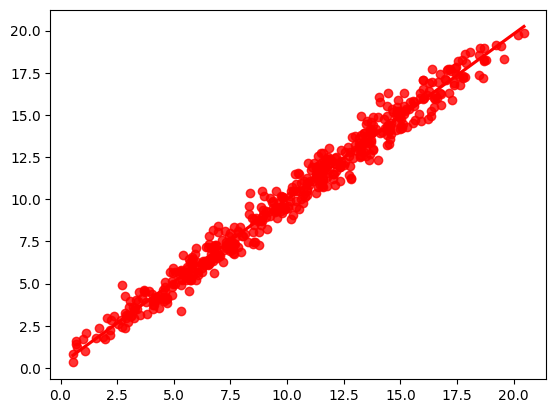

In [174]:
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
w0 = regr.coef_[0][0]
w1 = regr.coef_[0][1]
w2 = regr.coef_[0][2]
response = regr.predict(Xbar)
r2 = regr.score(Xbar, y)

import seaborn as sns
sns.regplot(x=y,y=response,ci=None,color ='red');

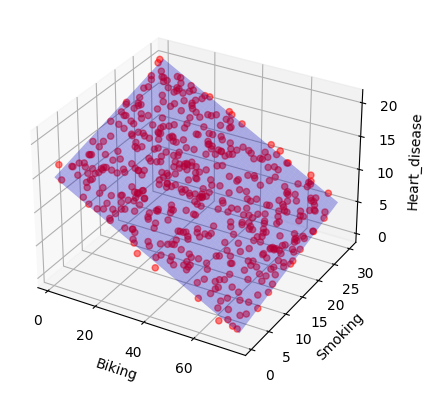

In [175]:
x_surf, y_surf = np.meshgrid(np.linspace(dataframe.biking.min(), dataframe.biking.max(), 100),
                             np.linspace(dataframe.smoking.min(), dataframe.smoking.max(), 100))

aaa = np.concatenate([np.ones((x_surf.ravel().shape[0],1)), 
                      x_surf.ravel()[...,np.newaxis], y_surf.ravel()[...,np.newaxis]], axis=-1)
fittedY = regr.predict(aaa)
fittedY=np.array(fittedY)

# Visualize the Data for Multiple Linear Regression
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataframe['biking'],dataframe['smoking'],dataframe['heart.disease'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Biking')
ax.set_ylabel('Smoking')
ax.set_zlabel('Heart_disease')
plt.show()

In [185]:
df = pd.read_csv('/home/quyet/DATA_ML/WorkSpace/segmentation/tutorial/Untitled Folder/data-main/50_Startups.csv')
print(df.columns)
print(df.head())
df.describe()

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [215]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings("ignore")

In [252]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

x = df.iloc[:,:3]
ones = np.ones((x.shape[0],1))
onehot = OneHotEncoder(sparse=False)
x_extend = onehot.fit_transform(df[['State']])
x = np.concatenate([ones, x_extend, x], axis=-1)
y = df.iloc[:,4:]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (40, 7)
X_test: (10, 7)
Y_train: (40, 1)
Y_test: (10, 1)


In [253]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [254]:
y_pred = model.predict(x_test)

Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 93.47


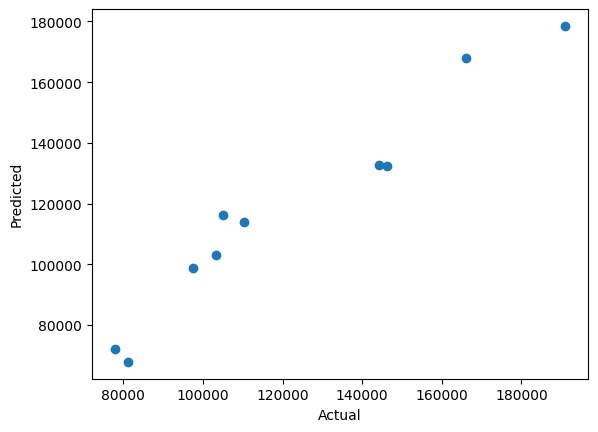

In [255]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

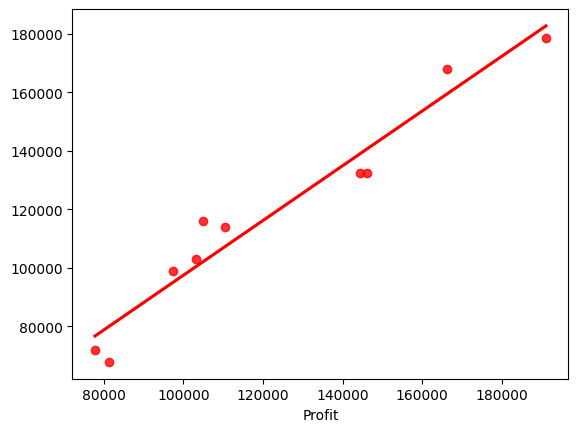

In [256]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [263]:
a = np.squeeze(y_test)
b = np.squeeze(y_pred)
c = a - b
pred_df=pd.DataFrame({'Actual Value':a,'Predicted Value':b,'Difference':c})
pred_df

998
[[12.74235222  9.07518443  5.76049086  2.92437356  2.34503904  2.42522877
   0.93092504  1.4370147   0.77690074]]


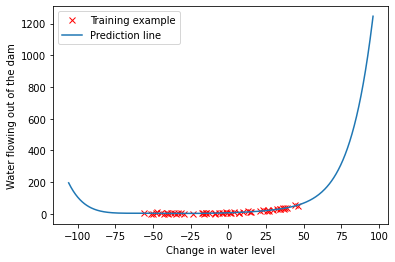

In [235]:
import random
random.seed(100)
data = np.loadtxt('/home/quyet/DATA_ML/Downloads/data.txt', delimiter=',')

def computeCost(X,y,theta):
    sqr_error = (np.matmul(X,theta.T) - y)**2
    sum_error = np.sum(sqr_error)
    m = np.size(y)
    error = (1/(2*m))*sum_error
    return error

def Normalize(X):
    n = np.copy(X)
    n[0,0] = 10
    s = np.std(n,0,dtype = np.float64)
    mu = np.mean(n,0)
    n = (n-mu)/s
    n[:,0] = 1
    return n, mu, s

def GradientDescent(X, y, theta, lr, num_loops, l=0):
    n = 0
    eraly_step = 100
    m = y.size
    min_cost, best_theta = np.inf, 0
    for i in range(0, num_loops):
        
        error = np.matmul(X,theta.T) - y
        theta[:,0] = theta[:,0] - lr*(np.dot(error.T, X)/m)[:,0]
        regular = l*(theta/m)
        # print(regular)
        theta[:,1:] = theta[:,1:] - lr*(np.dot(error.T, X)/m)[:,1:] + regular[:,1:]
        # theta = theta - lr*(np.matmul(error.T, X)/m)
        # best_theta = theta
        
        cost = abs(np.mean(computeCost(X,y,theta)))
        # print("iter %d/%d: total_loss=%.10f"%(i, num_loops, cost))
        if cost < min_cost:
            min_cost = cost
            best_theta = theta
            # if min_cost < 1e-9:
            #     break
        else:
            n +=1
        if n >= eraly_step:
            break
    print(i)
    return best_theta, min_cost
        
X = np.ones(data.shape)
X[:,1:] = data[:,:-1]
y = data[...,-1][...,np.newaxis]
# Add features
num_add = 9
for i in range(2,num_add):
    X = np.c_[X, X[:,1]**i]
    
m = y.size
n = X.shape[1]

min_x = np.min(X[:,1])
max_x = np.max(X[:,1])
xp = np.arange(min_x - 50, max_x + 50, 0.5)
xp = np.c_[np.ones(xp.size), xp]
for i in range(2,num_add):
    xp = np.c_[xp, xp[:,1]**i]
    
#Normalize X
[X, mu, sig] = Normalize(X)
xp -= mu
xp /= sig
xp[:,0] = 1

# Init weights
l = 0
d = X.shape[0]
theta = np.random.randn(1, num_add)
# theta = np.zeros((1, num_add))
best_theta, min_cost = GradientDescent(X, y, theta, lr=0.1, num_loops=999, l =l)
print(best_theta)

predict = np.matmul(X,best_theta.T) * 10000#chuyển về đơn vị người
#Plot kết quả
# plt.title(f'Polynomial regression with lambda = {l}')
plt.plot(X[:,1]*sig[1] +mu[1], y, 'rx')
#plot đường dự đoán
plt.plot(xp[:,1]*sig[1] +mu[1], np.matmul(xp,best_theta.T))
#Thêm chú thích 
plt.legend(['Training example', 'Prediction line'])
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')

plt.show()

Optimization terminated successfully.
         Current function value: 2.800095
         Iterations: 999
         Function evaluations: 1840
         Gradient evaluations: 1840
[ 12.74235281  11.69247611   5.41498993 -11.56058034   1.46443675
  29.45345506   7.77638663 -15.38899182  -6.45822881]


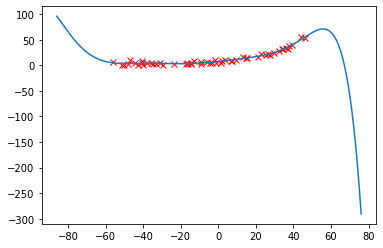

In [225]:
def _predict(X,Theta):
    return X @ Theta

def grad_reg(X, y, theta, l = 0):
	#m là số training example
	m = y.size
	#n là số feature (số cột của X)
	n = X.shape[1]
	#grad là vector thể hiện “độ dốc” cần trả về
	grad = np.zeros(n)
	#tính error = h(x) – y
	err = _predict(X, theta) - y
	#tính cost gradient cho theta 0, không có regularization term
	grad[0] = (1/m)*(X[:,0].T@err)
	#tính cost gradient cho các theta còn lại với regularization term
	grad[1:] = (1/m)*(X[:,1:].T@err) + (l/m)*theta[1:]
	#trả về ma trận grad là vector các cost gradient cho từng theta
	return grad

def J_reg(X, y, theta, l = 0):
	m = y.size
	t = theta[1:]
	#error bằng h(x) – y
	err = _predict(X, theta) - y
	#hạng tử regularization bằng lambda * tổng bình phương
	#các theta chia 2m
	regular = (l*(t.T@t))/(2*m)
	#J bằng bình phương error / 2m + hạng tử regularization
	J = (err.T@err)/(2*m) + regular
	#trả về kết quả
	return J

data = np.loadtxt('/home/quyet/DATA_ML/Downloads/data.txt',delimiter=',')
#Lấy các cột đầu của data và thêm cột 1 vào để làm X
X = np.c_[np.ones(data.shape[0]), data[:,:-1]]
#lấy cột cuối làm y
y = data[:,-1]
#Vòng lặp từ mũ 2 đến mũ 8
for i in range(2,9):
	#thêm một cột feature vào bên phải X với giá trị bằng x1 mũ i
	X = np.c_[X, X[:,1]**i]
#Lấy kích thước y làm m
m = y.size
#Lấy số cột của X làm n
n = X.shape[1]
#tính min và max của x1
min_x = np.min(X[:,1])
max_x = np.max(X[:,1])
#tạo ma trận xp có giá trị từ min_x – 30 đến max_x + 30, step là 0.5 (mỗi giá trị lệch nhau 0.5)
xp = np.arange(min_x - 30, max_x + 30, 0.5)
#thêm x0 bằng 1 cho xp
xp = np.c_[np.ones(xp.size), xp]
#thực hiện thêm polynomial feature như đã làm với X
for i in range(2,9):
	xp = np.c_[xp, xp[:,1]**i]
#Normalize X
[X, mu, sig] = Normalize(X)
#thực hiện normalize xp bằng mu và sigma tính từ X
xp -= mu
xp /= sig
xp[:,0] = 1

import scipy.optimize as opt
#khởi tạo theta ban đầu bằng 0
itheta = np.zeros(n)
#biến l chính là lambda, bạn có thể thay đổi
# biến này để thấy sự khác biệt khi không dùng regularization (l = 0)
# và có dùng l != 0
l = 0
# hàm J_reg rút gọn, chỉ nhận 1 parameter t
j = lambda t: J_reg(X, y, t, l)
# hàm grad_reg rút gọn, chỉ nhận 1 parameter t
g = lambda t: grad_reg(X, y, t, l)

theta = opt.fmin_cg(j, itheta, g)
print(theta)
#plot bộ training set, cần đảo ngược quá trình normalize bằng cách * sigma + mu
plt.plot(X[:,1]*sig[1] +mu[1], y, 'rx')
#plot đường dự đoán
plt.plot(xp[:,1]*sig[1] +mu[1], xp@theta)

plt.show()

[ 12.74235222  11.69242979   5.41450912 -11.55989222   1.46604309
  29.45183444   7.77419057 -15.38788683  -6.45706636]


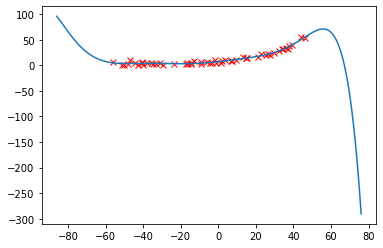

In [96]:
def norm_eqn_reg(X, y, l = 0):
	#n là số feature
	n = X.shape[1]
	#tạo identity matrix n*n
	L = np.eye(n)
	#gán phần tử 0,0 bằng 0
	L[0,0] = 0
    #nhân tử đầu tiên
	a = np.linalg.pinv(X.T @ X + l*L)
	#nhân tử thứ 2
	b = X.T @ y
	
	#tính theta
	theta = a @ b
	return theta

theta_check = norm_eqn_reg(X, y, l=0)
print(theta_check)
#plot bộ training set, cần đảo ngược quá trình normalize bằng cách * sigma + mu
plt.plot(X[:,1]*sig[1] +mu[1], y, 'rx')
#plot đường dự đoán
plt.plot(xp[:,1]*sig[1] +mu[1], xp@theta_check)

plt.show()